In [118]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

## **1. Entendimiento inicial**

Se carga el dataset

In [119]:
EXCEL_PATH = "./data/Base infecciones POPTH.xlsx"

In [120]:
df = pd.read_excel(EXCEL_PATH, sheet_name=0)

Se revisan las dimensiones del dataset.

In [121]:
print("Número de columnas(variables):", df.shape[1])
print("Número de filas (pacientes):", df.shape[0])

Número de columnas(variables): 60
Número de filas (pacientes): 558


In [122]:
# formatear el nombre de las columnas, algunas tienen espacios al inicio o final
df.columns = df.columns.str.strip()

Se listan los atributos (columnas) del dataset y sus tipos

In [123]:
df.dtypes

#Paciente_Tx                                  object
Año_Tx                                        object
Fecha_Tx                                      object
Código anonimizado                            object
Edad                                          object
Sexo                                          object
Etiología_#1                                  object
Etiología_#2                                  object
Child_Pugh_Score                              object
Meld_Score                                    object
Diabetes_Mellitus                             object
Tabaquismo                                    object
Alcoholismo                                   object
Hipertensión_Arterial                         object
Peso_previo_Cx                                object
Talla                                         object
IMC                                           object
Antecedente_UCI_6_meses_PreOP                 object
UCI_al_Momento_Tx                             

In [124]:
# contar tipos de datos
df.dtypes.value_counts()

object    60
dtype: int64

Se muestran las primeras filas para entender la estructura de los datos

In [125]:
df.head()

,#Paciente_Tx,Año_Tx,Fecha_Tx,Código anonimizado,Edad,Sexo,Etiología_#1,Etiología_#2,Child_Pugh_Score,Meld_Score,...,Inmunosupresión_con_Anticuerpos,Inmunosupresor_1_1mesPostTx,Inmunosupresor_2_PostTx_1mesPx,Inmunosupresor_1_6mesesPostx,Inmunosupresor_2_6mesesPostTx,Vivo_Hoy,Fecha_Control/Muerte,SOBREVIDA_DIAS,SOBREVIDA_MESES,SOBREVIDA_AÑOS
0,Número de paciente,Año del trasplante,Tiempo transcurrido \ndesde el trasplante \nhe...,Código anonimizado para tratamiento de datos d...,Tiempo transcurrido \na partir del \nnacimient...,"Condición orgánica, \nmasculina o \nfemenina",Enfermedad que \nlo llevó a la \nenfermedad he...,Enfermedad que \nlo llevó a la \nenfermedad he...,Child_Pugh_Score,Meld_Score,...,INMUNOSUPRESIÓN CON ANTICUERPOS RECOMBINADOS P...,INMUNOSUPRESOR BASAL 1 MES POST TX,INMUNOSUPRESOR AÑADIDO 1 MES POST TX,INMUNOSUPRESOR BASAL 6 MES POST TX,INMUNOSUPRESOR AÑADIDO 6 MES POST TX,Define Si está vivo hoy,Fecha de control/Muerte,Sobrevida en días post trasplante,Sobrevida en meses post trasplante,Sobrevida en años post trasplante
1,1,2009,39816,P001,62,1,1,0,3,18,...,1,1,1,2,1,0,40091,275,9.17,0.76
2,2,2009,39823,P002,62,1,3,0,2,17,...,9999,9999,9999,9999,9999,0,39824,1,0.03,0
3,3,2009,39847,P003,56,2,8,0,1,15,...,9999,1,1,1,0,1,45291,5444,181.47,15.12
4,4,2009,39849,P004,58,1,3,0,1,9,...,1,1,1,1,0,1,45291,5442,181.4,15.12


Codebook

In [126]:
df_codebook_original = pd.read_excel(EXCEL_PATH, sheet_name=2)

In [127]:
df_codebook_original.columns = df_codebook_original.columns.str.strip()

In [128]:
print("Número de columnas(variables):", df_codebook_original.shape[1])

Número de columnas(variables): 69


In [129]:
df_codebook_original

,#Paciente_Tx,Año_Tx,Fecha_Tx,ID,Nombre,Edad,Sexo,Etiología_#1,Etiología_#2,Child_Pugh_Score,...,SOBREVIDA_DIAS,SOBREVIDA_MESES,SOBREVIDA_AÑOS,#,ID.1,Nombre,Infección POP,Tipo de infección,Aislamiento,Fecha
0,Interpretación,Año del trasplante,Tiempo transcurrido \ndesde el trasplante \nhe...,ID del paciente,Nombre del paciente,Tiempo transcurrido \na partir del \nnacimient...,"Condición orgánica, \nmasculina o \nfemenina",Enfermedad que \nlo llevó a la \nenfermedad he...,Enfermedad que \nlo llevó a la \nenfermedad he...,Child_Pugh_Score,...,Sobrevida en días post trasplante,Sobrevida en meses post trasplante,Sobrevida en años post trasplante,0.0,NaN,NaN,No,NaN,NaN,NaN
1,0,NaN,NaN,NaN,NaN,NaN,NaN,,NINGUNA,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,Sí,ISO,K. PNEUMONIAE,NaN
2,1,NaN,NaN,NaN,NaN,NaN,M,HCV,HCV,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,IVU,CMV,NaN
3,2,NaN,NaN,NaN,NaN,NaN,F,HBV,HBV,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NEUMONÍA,ENTEROCOCO FAECIUM,NaN
4,3,NaN,NaN,NaN,NaN,NaN,NaN,NASH,NASH,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,CVC,STREPTOCOCCUS VIRIDANS,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Hay más variables en el codebook entregado que en el dataset. Revisando se encontró que hay algunas que no existen en el dataset o tienen nombres diferentes. Por lo que se procederá a crear un diccionario de datos organizado.

In [130]:
df_original = pd.read_excel(EXCEL_PATH, sheet_name=0)
df_original.columns = df_original.columns.str.strip()
first_row = df_original.iloc[0].reset_index()

In [131]:
df_codebook_new = first_row.copy()
df_codebook_new.columns = ["Column", "Description"]
df_codebook_new["Column"] = df_codebook_new["Column"].str.strip()
df_codebook_new["Description"] = df_codebook_new["Description"].str.strip().str.replace("\n", "")
df_codebook_new["Dtype"] = df_codebook_new["Column"].map(df.dtypes.astype(str))
df_codebook_new

,Column,Description,Dtype
0,#Paciente_Tx,Número de paciente,object
1,Año_Tx,Año del trasplante,object
2,Fecha_Tx,Tiempo transcurrido desde el trasplante hepático,object
3,Código anonimizado,Código anonimizado para tratamiento de datos d...,object
4,Edad,Tiempo transcurrido a partir del nacimiento de...,object
5,Sexo,"Condición orgánica, masculina o femenina",object
6,Etiología_#1,Enfermedad que lo llevó a la enfermedad hepática,object
7,Etiología_#2,Enfermedad que lo llevó a la enfermedad hepática,object
8,Child_Pugh_Score,Child_Pugh_Score,object
9,Meld_Score,Meld_Score,object


In [132]:
def creat_dic(col_name, df_codebook_original):
    dic_column = {}
    # Solo intentar si la columna existe en el codebook original
    if col_name in df_codebook_original.columns:
        df_column = df_codebook_original[col_name].loc[1:]
        df_column.index = df_column.index-1
        dic_column = df_column.to_dict()
        # Elimina del diccionario todas las llaves cuyos valores son NaN.
        dic_column = {key: value for key, value in dic_column.items() if not pd.isna(value)}
       
    else:
        print(f"Columna '{col_name}' no encontrada en el codebook original.")
    return dic_column

# 1. Identificar las columnas categóricas (o tipo 'object')
cat_cols = df_codebook_new["Dtype"] == "object"

# 2. Aplicar la lógica de mapeo y limpieza en un solo paso
df_codebook_new["Choices"] = df_codebook_new["Column"].map(lambda col: creat_dic(col, df_codebook_original))

# 3. Mostrar el resultado
display(df_codebook_new)

Columna 'Código anonimizado' no encontrada en el codebook original.
Columna 'Tiempo_Isquemia_caliente' no encontrada en el codebook original.


,Column,Description,Dtype,Choices
0,#Paciente_Tx,Número de paciente,object,"{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: ..."
1,Año_Tx,Año del trasplante,object,{}
2,Fecha_Tx,Tiempo transcurrido desde el trasplante hepático,object,{}
3,Código anonimizado,Código anonimizado para tratamiento de datos d...,object,{}
4,Edad,Tiempo transcurrido a partir del nacimiento de...,object,{}
5,Sexo,"Condición orgánica, masculina o femenina",object,"{1: 'M', 2: 'F'}"
6,Etiología_#1,Enfermedad que lo llevó a la enfermedad hepática,object,"{0: ' ', 1: 'HCV', 2: 'HBV', 3: 'NASH', 4: 'AL..."
7,Etiología_#2,Enfermedad que lo llevó a la enfermedad hepática,object,"{0: 'NINGUNA', 1: 'HCV', 2: 'HBV', 3: 'NASH', ..."
8,Child_Pugh_Score,Child_Pugh_Score,object,{}
9,Meld_Score,Meld_Score,object,{}


In [133]:
df_codebook_new.at[0, "Choices"] = {}
df_codebook_new["Var Type"] = np.where(df_codebook_new["Choices"] == {}, "Numerical", "Categorical")

In [134]:
df_codebook_new

,Column,Description,Dtype,Choices,Var Type
0,#Paciente_Tx,Número de paciente,object,{},Numerical
1,Año_Tx,Año del trasplante,object,{},Numerical
2,Fecha_Tx,Tiempo transcurrido desde el trasplante hepático,object,{},Numerical
3,Código anonimizado,Código anonimizado para tratamiento de datos d...,object,{},Numerical
4,Edad,Tiempo transcurrido a partir del nacimiento de...,object,{},Numerical
5,Sexo,"Condición orgánica, masculina o femenina",object,"{1: 'M', 2: 'F'}",Categorical
6,Etiología_#1,Enfermedad que lo llevó a la enfermedad hepática,object,"{0: ' ', 1: 'HCV', 2: 'HBV', 3: 'NASH', 4: 'AL...",Categorical
7,Etiología_#2,Enfermedad que lo llevó a la enfermedad hepática,object,"{0: 'NINGUNA', 1: 'HCV', 2: 'HBV', 3: 'NASH', ...",Categorical
8,Child_Pugh_Score,Child_Pugh_Score,object,{},Numerical
9,Meld_Score,Meld_Score,object,{},Numerical


In [135]:
# guardar la fila como un archivo JSON
with open("new_codebook.json", "w", encoding="utf-8") as f:
    json.dump(df_codebook_new.set_index("Column").to_dict(orient="index"), f, ensure_ascii=False, indent=3)

## **2. Análisis de calidad y preparación de datos**

In [136]:
# cargar nuevo codebook
with open("new_codebook.json", "r", encoding="utf-8") as f:
    df_codebook = json.load(f)

Dimensiones de calidad:
1. Completitud: Valores nulos​
2. Unicidad: Detectar valores duplicados
3. Consistencia: Validación de los tipos de datos

### **Descripción de las variables**

- **Inmunosupresor_1_Postx:** INMUNOSUPRESOR BASAL POST TRASPLANTE  
- **Inmunosupresor_2_PostTx:** INMUNOSUPRESOR AÑADIDO POSTRASPLANTE  
- **Inmunosupresión_con_Anticuerpos:** INMUNOSUPRESIÓN CON ANTICUERPOS RECOMBINADOS POSTRASPLANTE  
- **Inmunosupresor_1_1mesPostTx:** INMUNOSUPRESOR BASAL 1 MES POST TX  
- **Inmunosupresor_2_PostTx_1mesPx:** INMUNOSUPRESOR AÑADIDO 1 MES POST TX  
- **Inmunosupresor_1_6mesesPostx:** INMUNOSUPRESOR BASAL 6 MES POST TX  
- **Inmunosupresor_2_6mesesPostTx:** INMUNOSUPRESOR AÑADIDO 6 MES POST TX  
- **Vivo_Hoy:** Define si está vivo hoy  
- **Fecha_Control/Muerte:** Fecha de control o muerte  
- **SOBREVIDA_DIAS:** Sobrevida en días post trasplante  
- **SOBREVIDA_MESES:** Sobrevida en meses post trasplante  
- **SOBREVIDA_AÑOS:** Sobrevida en años post trasplante  
- **Dias_Estancia_Hospitalaria:** Días totales de estancia hospitalaria  
- **Días_Hospitalización_UCI:** Días de hospitalización en UCI  

In [137]:
estancias_globales = [
    "Inmunosupresor_1_Postx",
    "Inmunosupresor_2_PostTx",
    "Inmunosupresión_con_Anticuerpos",
    "Inmunosupresor_1_1mesPostTx",
    "Inmunosupresor_2_PostTx_1mesPx",
    "Inmunosupresor_1_6mesesPostx",
    "Inmunosupresor_2_6mesesPostTx",
    "Vivo_Hoy",
    "Fecha_Control/Muerte",
    "SOBREVIDA_DIAS",
    "SOBREVIDA_MESES",
    "SOBREVIDA_AÑOS",
    "Dias_Estancia_Hospitalaria",
    "Días_Hospitalización_UCI"
]

In [138]:
df_original = df_original.iloc[1:].reset_index(drop=True)

In [139]:
infecciones_popth_df = df_original[estancias_globales]

infecciones_popth_df

,Inmunosupresor_1_Postx,Inmunosupresor_2_PostTx,Inmunosupresión_con_Anticuerpos,Inmunosupresor_1_1mesPostTx,Inmunosupresor_2_PostTx_1mesPx,Inmunosupresor_1_6mesesPostx,Inmunosupresor_2_6mesesPostTx,Vivo_Hoy,Fecha_Control/Muerte,SOBREVIDA_DIAS,SOBREVIDA_MESES,SOBREVIDA_AÑOS,Dias_Estancia_Hospitalaria,Días_Hospitalización_UCI
0,1,1,1,1,1,2,1,0,40091,275,9.17,0.76,9.35,0
1,1,1,9999,9999,9999,9999,9999,0,39824,1,0.03,0,0.81,0
2,1,1,9999,1,1,1,0,1,45291,5444,181.47,15.12,10.9,0
3,1,1,1,1,1,1,0,1,45291,5442,181.4,15.12,8.03,0
4,1,1,9999,1,1,2,1,1,45291,4724,157.47,13.12,7.23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,2,1,0,2,1,2,1,1,45556,0,0,0,0,0
553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,45747,174,5,0,0,0
554,2,1,0,2,1,2,1,1,45784,203,6,0,0,0
555,2,1,0,2,1,2,0,1,45790,196,6,0,0,0


## **3. Análisis Individual de Variables (EDA)**

In [140]:
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

### **3.1 Calidad de Datos**


**Completitud: Valores nulos**

In [141]:
display(infecciones_popth_df.isna().sum())
numero_filas_con_nulos = infecciones_popth_df.isna().any(axis=1).sum()
print(f"\nNúmero de filas con al menos un valor nulo: {numero_filas_con_nulos}, lo que representa el {numero_filas_con_nulos / infecciones_popth_df.shape[0] * 100:.2f}% del total de filas.")

Inmunosupresor_1_Postx              1
Inmunosupresor_2_PostTx             2
Inmunosupresión_con_Anticuerpos     7
Inmunosupresor_1_1mesPostTx         8
Inmunosupresor_2_PostTx_1mesPx      8
Inmunosupresor_1_6mesesPostx       11
Inmunosupresor_2_6mesesPostTx      11
Vivo_Hoy                            0
Fecha_Control/Muerte                0
SOBREVIDA_DIAS                      0
SOBREVIDA_MESES                     0
SOBREVIDA_AÑOS                      0
Dias_Estancia_Hospitalaria          0
Días_Hospitalización_UCI            0
dtype: int64


Número de filas con al menos un valor nulo: 13, lo que representa el 2.33% del total de filas.


**Unicidad: Valores duplicados**

In [142]:
# Revisamos duplicados
num_duplicados = infecciones_popth_df.duplicated().sum()
print(f"Número de duplicados: {num_duplicados} ({num_duplicados/len(infecciones_popth_df)*100:.2f}%)")

Número de duplicados: 0 (0.00%)


### **3.2 Análisis Individual - Variables Categóricas**

#### **Inmunosupresor_1_Postx: INMUNOSUPRESOR BASAL POST TRASPLANTE**

Distribución de Inmunosupresor_1_Postx:
1: 346 (62.23%)
2: 193 (34.71%)
9999: 11 (1.98%)
0: 4 (0.72%)
3: 1 (0.18%)
/: 1 (0.18%)


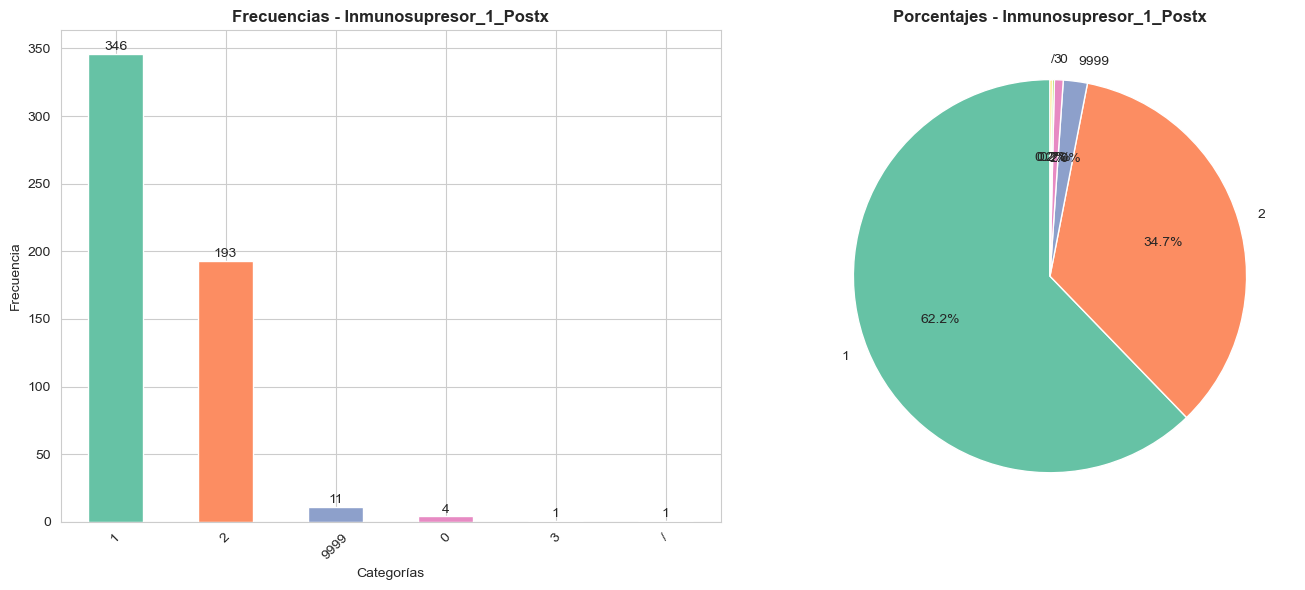

In [143]:
columna = "Inmunosupresor_1_Postx"

# Frecuencias y porcentajes
columna_stats = infecciones_popth_df[columna].value_counts()
columna_pct = infecciones_popth_df[columna].value_counts(normalize=True) * 100

print(f"Distribución de {columna}:")
print("="*50)
for valor, freq in columna_stats.items():
    pct = columna_pct[valor]
    print(f"{valor}: {freq} ({pct:.2f}%)")

# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de barras con frecuencias
paleta = sns.color_palette("Set2", len(columna_stats))
columna_stats.plot(kind='bar', ax=ax1, color=paleta)
ax1.set_title(f'Frecuencias - {columna}', fontsize=12, fontweight='bold')
ax1.set_xlabel('Categorías', fontsize=10)
ax1.set_ylabel('Frecuencia', fontsize=10)
ax1.tick_params(axis='x', rotation=45)

# Añadir etiquetas de valores
for i, v in enumerate(columna_stats):
    ax1.text(i, v + 0.5, str(v), ha='center', va='bottom')

# Gráfico de pastel con porcentajes
ax2.pie(columna_pct, labels=columna_pct.index, autopct='%1.1f%%', colors=paleta, startangle=90)
ax2.set_title(f'Porcentajes - {columna}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


#### **Inmunosupresor_2_PostTx: INMUNOSUPRESOR AÑADIDO POSTRASPLANTE**

Distribución de Inmunosupresor_2_PostTx:
1: 536 (96.58%)
9999: 11 (1.98%)
0: 7 (1.26%)
2: 1 (0.18%)


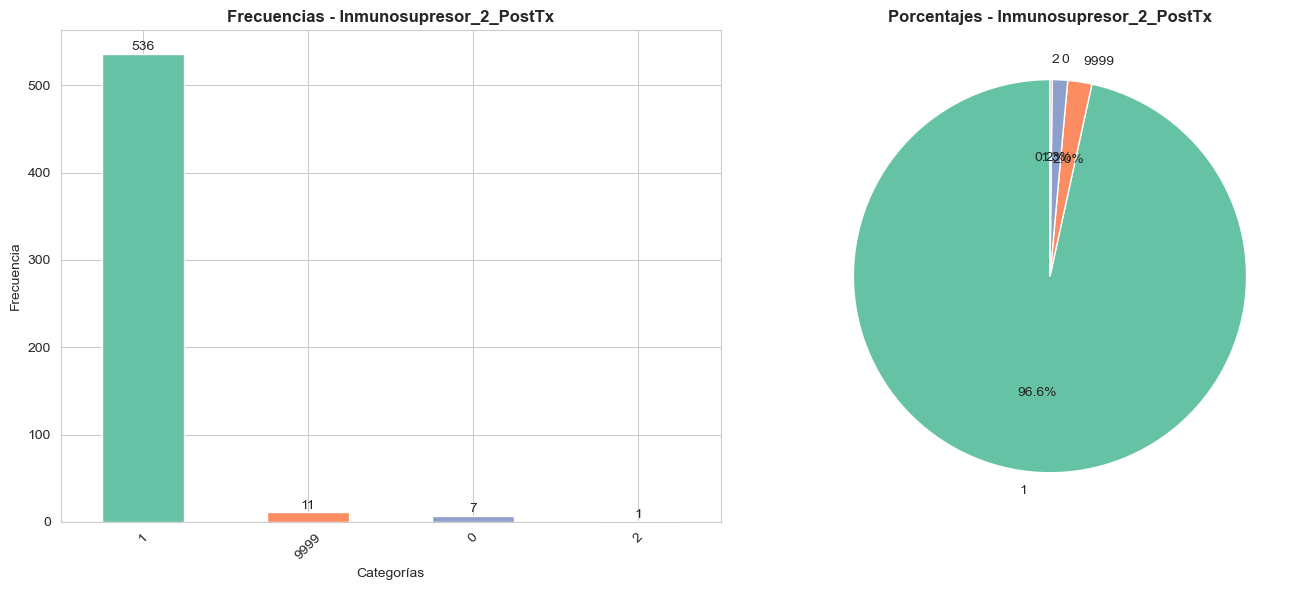

In [144]:
columna = "Inmunosupresor_2_PostTx"

columna_stats = infecciones_popth_df[columna].value_counts()
columna_pct = infecciones_popth_df[columna].value_counts(normalize=True) * 100

print(f"Distribución de {columna}:")
print("="*50)
for valor, freq in columna_stats.items():
    pct = columna_pct[valor]
    print(f"{valor}: {freq} ({pct:.2f}%)")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

paleta = sns.color_palette("Set2", len(columna_stats))
columna_stats.plot(kind='bar', ax=ax1, color=paleta)
ax1.set_title(f'Frecuencias - {columna}', fontsize=12, fontweight='bold')
ax1.set_xlabel('Categorías', fontsize=10)
ax1.set_ylabel('Frecuencia', fontsize=10)
ax1.tick_params(axis='x', rotation=45)

for i, v in enumerate(columna_stats):
    ax1.text(i, v + 0.5, str(v), ha='center', va='bottom')

ax2.pie(columna_pct, labels=columna_pct.index, autopct='%1.1f%%', colors=paleta, startangle=90)
ax2.set_title(f'Porcentajes - {columna}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

#### **Inmunosupresión_con_Anticuerpos: INMUNOSUPRESIÓN CON ANTICUERPOS RECOMBINADOS POSTRASPLANTE**

Distribución de Inmunosupresión_con_Anticuerpos:
9999: 360 (65.45%)
0: 171 (31.09%)
1: 19 (3.45%)


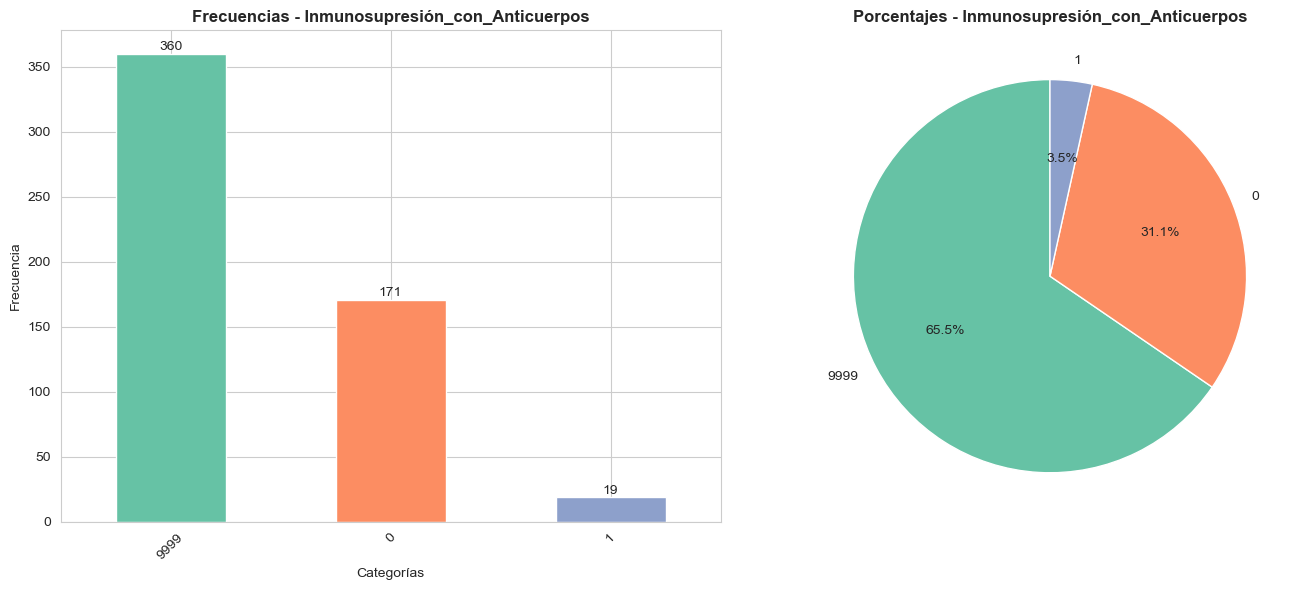

In [145]:
columna = "Inmunosupresión_con_Anticuerpos"

columna_stats = infecciones_popth_df[columna].value_counts()
columna_pct = infecciones_popth_df[columna].value_counts(normalize=True) * 100

print(f"Distribución de {columna}:")
print("="*50)
for valor, freq in columna_stats.items():
    pct = columna_pct[valor]
    print(f"{valor}: {freq} ({pct:.2f}%)")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

paleta = sns.color_palette("Set2", len(columna_stats))
columna_stats.plot(kind='bar', ax=ax1, color=paleta)
ax1.set_title(f'Frecuencias - {columna}', fontsize=12, fontweight='bold')
ax1.set_xlabel('Categorías', fontsize=10)
ax1.set_ylabel('Frecuencia', fontsize=10)
ax1.tick_params(axis='x', rotation=45)

for i, v in enumerate(columna_stats):
    ax1.text(i, v + 0.5, str(v), ha='center', va='bottom')

ax2.pie(columna_pct, labels=columna_pct.index, autopct='%1.1f%%', colors=paleta, startangle=90)
ax2.set_title(f'Porcentajes - {columna}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

#### **Inmunosupresor_1_1mesPostTx: INMUNOSUPRESOR BASAL 1 MES POST TX**

Distribución de Inmunosupresor_1_1mesPostTx:
1: 281 (51.18%)
2: 224 (40.80%)
9999: 33 (6.01%)
0: 10 (1.82%)
3: 1 (0.18%)


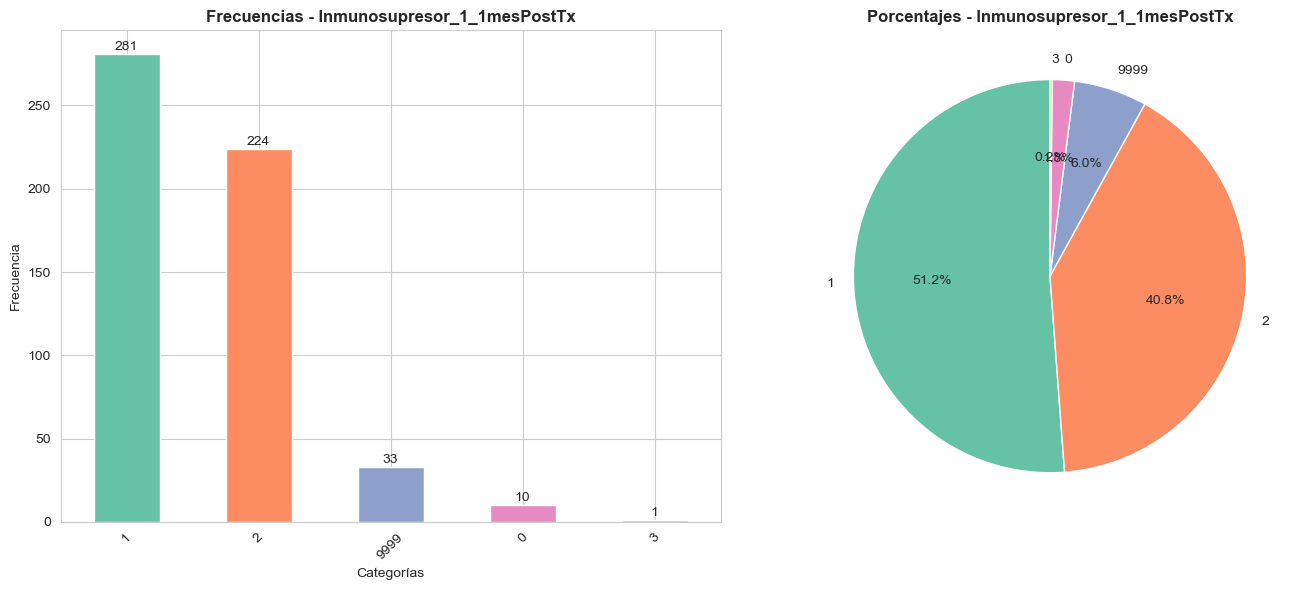

In [146]:
columna = "Inmunosupresor_1_1mesPostTx"

columna_stats = infecciones_popth_df[columna].value_counts()
columna_pct = infecciones_popth_df[columna].value_counts(normalize=True) * 100

print(f"Distribución de {columna}:")
print("="*50)
for valor, freq in columna_stats.items():
    pct = columna_pct[valor]
    print(f"{valor}: {freq} ({pct:.2f}%)")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

paleta = sns.color_palette("Set2", len(columna_stats))
columna_stats.plot(kind='bar', ax=ax1, color=paleta)
ax1.set_title(f'Frecuencias - {columna}', fontsize=12, fontweight='bold')
ax1.set_xlabel('Categorías', fontsize=10)
ax1.set_ylabel('Frecuencia', fontsize=10)
ax1.tick_params(axis='x', rotation=45)

for i, v in enumerate(columna_stats):
    ax1.text(i, v + 0.5, str(v), ha='center', va='bottom')

ax2.pie(columna_pct, labels=columna_pct.index, autopct='%1.1f%%', colors=paleta, startangle=90)
ax2.set_title(f'Porcentajes - {columna}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

#### **Inmunosupresor_2_PostTx_1mesPx: INMUNOSUPRESOR AÑADIDO 1 MES POST TX**

Distribución de Inmunosupresor_2_PostTx_1mesPx:
1: 494 (89.98%)
9999: 33 (6.01%)
0: 22 (4.01%)


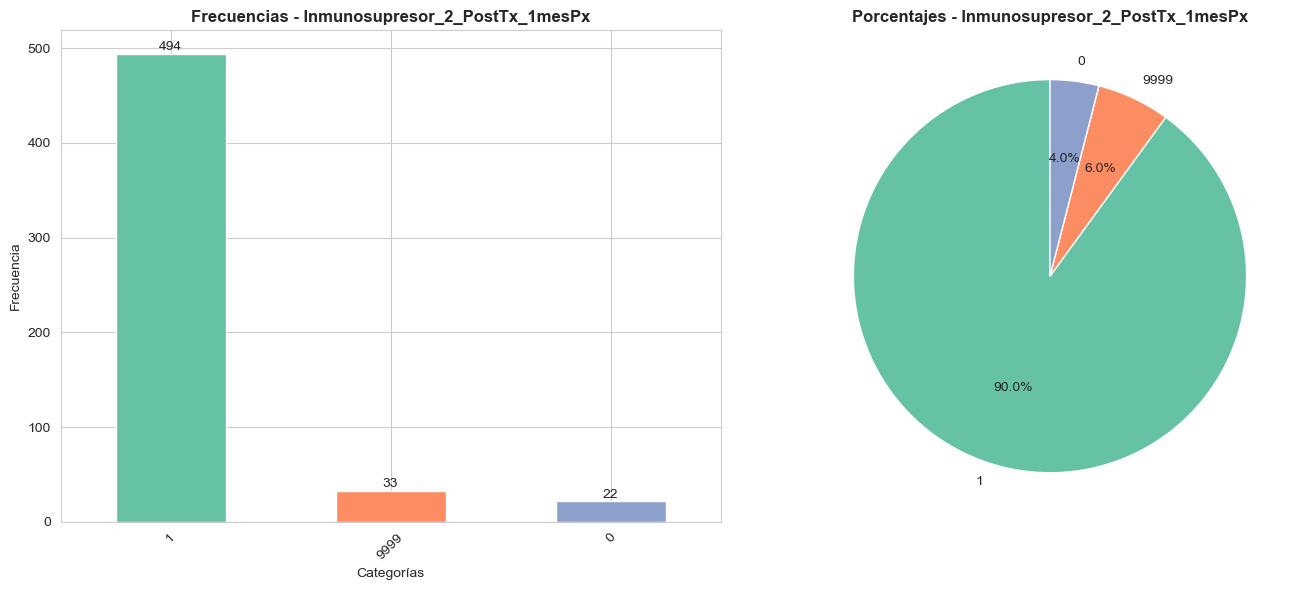

In [147]:
columna = "Inmunosupresor_2_PostTx_1mesPx"

columna_stats = infecciones_popth_df[columna].value_counts()
columna_pct = infecciones_popth_df[columna].value_counts(normalize=True) * 100

print(f"Distribución de {columna}:")
print("="*50)
for valor, freq in columna_stats.items():
    pct = columna_pct[valor]
    print(f"{valor}: {freq} ({pct:.2f}%)")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

paleta = sns.color_palette("Set2", len(columna_stats))
columna_stats.plot(kind='bar', ax=ax1, color=paleta)
ax1.set_title(f'Frecuencias - {columna}', fontsize=12, fontweight='bold')
ax1.set_xlabel('Categorías', fontsize=10)
ax1.set_ylabel('Frecuencia', fontsize=10)
ax1.tick_params(axis='x', rotation=45)

for i, v in enumerate(columna_stats):
    ax1.text(i, v + 0.5, str(v), ha='center', va='bottom')

ax2.pie(columna_pct, labels=columna_pct.index, autopct='%1.1f%%', colors=paleta, startangle=90)
ax2.set_title(f'Porcentajes - {columna}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

#### **Inmunosupresor_1_6mesesPostx: INMUNOSUPRESOR BASAL 6 MES POST TX**

Distribución de Inmunosupresor_1_6mesesPostx:
2: 261 (47.80%)
1: 220 (40.29%)
9999: 56 (10.26%)
3: 5 (0.92%)
0: 4 (0.73%)


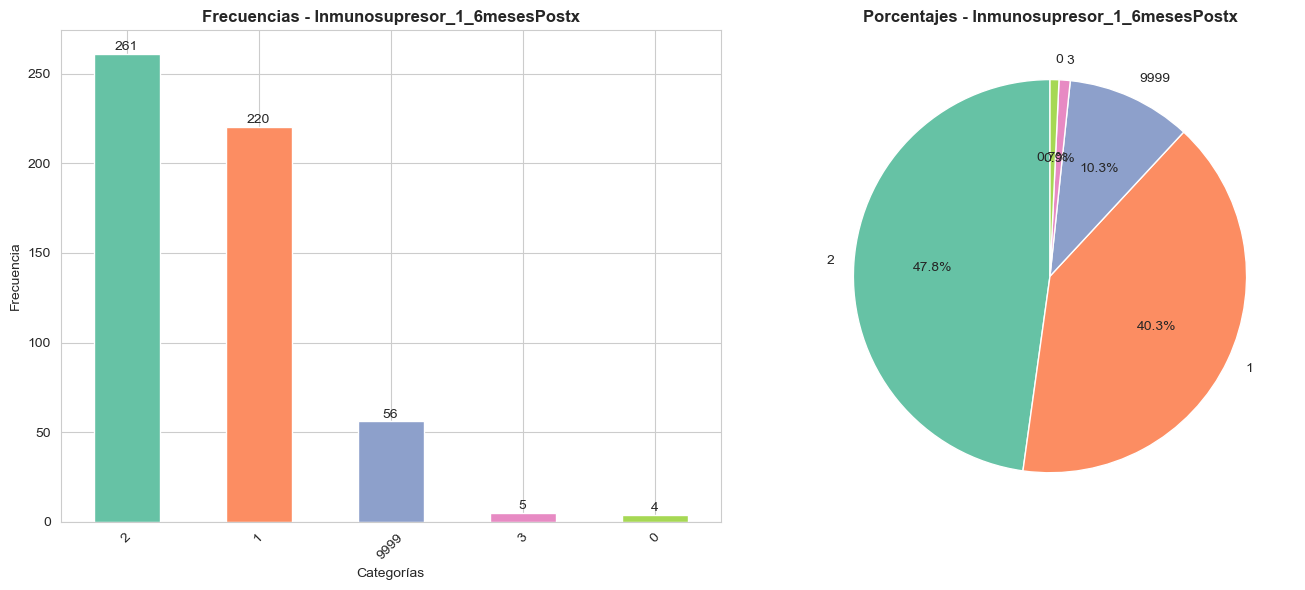

In [148]:
columna = "Inmunosupresor_1_6mesesPostx"

columna_stats = infecciones_popth_df[columna].value_counts()
columna_pct = infecciones_popth_df[columna].value_counts(normalize=True) * 100

print(f"Distribución de {columna}:")
print("="*50)
for valor, freq in columna_stats.items():
    pct = columna_pct[valor]
    print(f"{valor}: {freq} ({pct:.2f}%)")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

paleta = sns.color_palette("Set2", len(columna_stats))
columna_stats.plot(kind='bar', ax=ax1, color=paleta)
ax1.set_title(f'Frecuencias - {columna}', fontsize=12, fontweight='bold')
ax1.set_xlabel('Categorías', fontsize=10)
ax1.set_ylabel('Frecuencia', fontsize=10)
ax1.tick_params(axis='x', rotation=45)

for i, v in enumerate(columna_stats):
    ax1.text(i, v + 0.5, str(v), ha='center', va='bottom')

ax2.pie(columna_pct, labels=columna_pct.index, autopct='%1.1f%%', colors=paleta, startangle=90)
ax2.set_title(f'Porcentajes - {columna}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

#### **Inmunosupresor_2_6mesesPostTx: INMUNOSUPRESOR AÑADIDO 6 MES POST TX**

Distribución de Inmunosupresor_2_6mesesPostTx:
1: 425 (77.84%)
0: 60 (10.99%)
9999: 57 (10.44%)
2: 4 (0.73%)


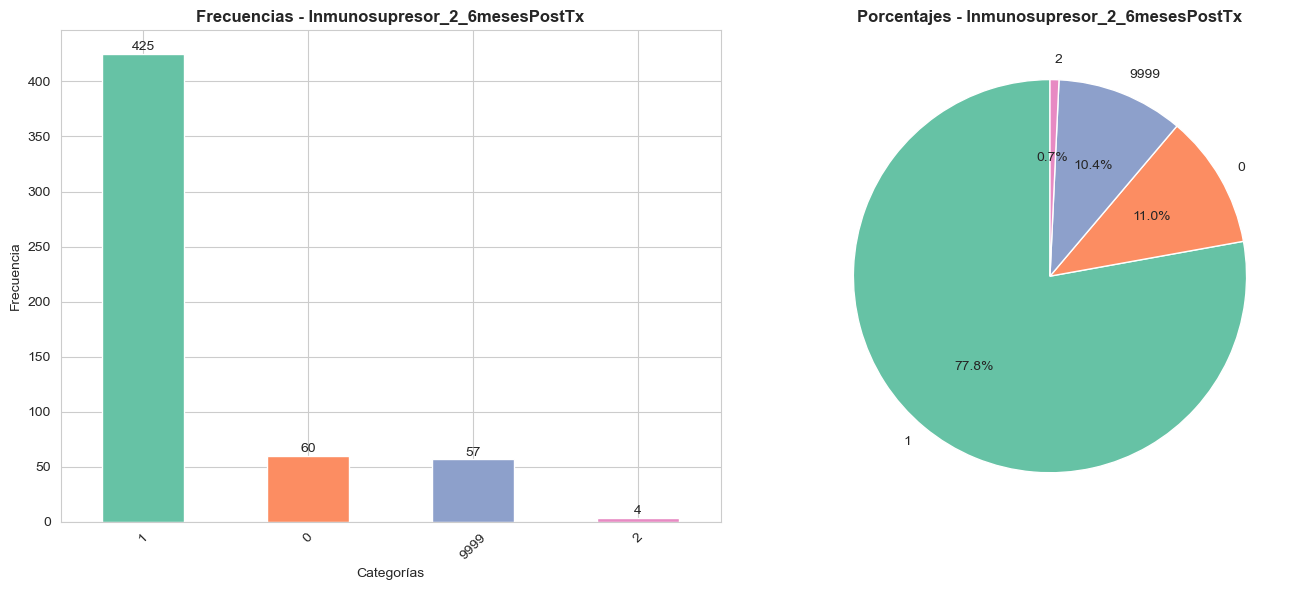

In [149]:
columna = "Inmunosupresor_2_6mesesPostTx"

columna_stats = infecciones_popth_df[columna].value_counts()
columna_pct = infecciones_popth_df[columna].value_counts(normalize=True) * 100

print(f"Distribución de {columna}:")
print("="*50)
for valor, freq in columna_stats.items():
    pct = columna_pct[valor]
    print(f"{valor}: {freq} ({pct:.2f}%)")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

paleta = sns.color_palette("Set2", len(columna_stats))
columna_stats.plot(kind='bar', ax=ax1, color=paleta)
ax1.set_title(f'Frecuencias - {columna}', fontsize=12, fontweight='bold')
ax1.set_xlabel('Categorías', fontsize=10)
ax1.set_ylabel('Frecuencia', fontsize=10)
ax1.tick_params(axis='x', rotation=45)

for i, v in enumerate(columna_stats):
    ax1.text(i, v + 0.5, str(v), ha='center', va='bottom')

ax2.pie(columna_pct, labels=columna_pct.index, autopct='%1.1f%%', colors=paleta, startangle=90)
ax2.set_title(f'Porcentajes - {columna}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

#### **Vivo_Hoy: Define si está vivo hoy**

Distribución de Vivo_Hoy:
1: 395 (70.92%)
0: 162 (29.08%)


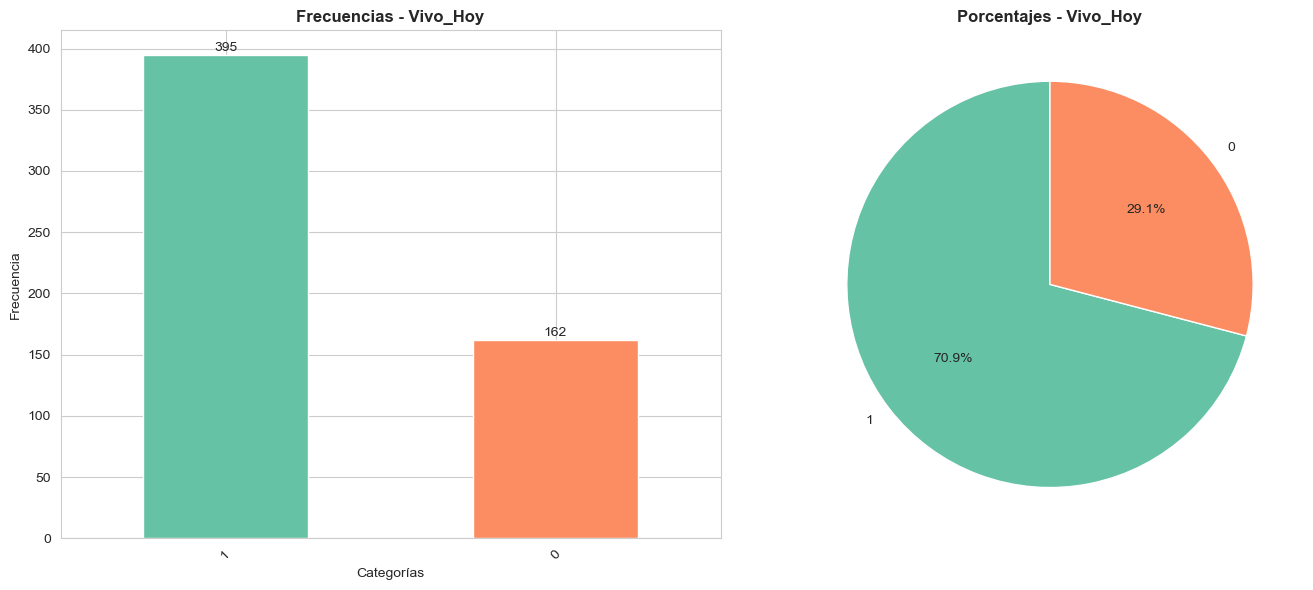

In [150]:
columna = "Vivo_Hoy"

columna_stats = infecciones_popth_df[columna].value_counts()
columna_pct = infecciones_popth_df[columna].value_counts(normalize=True) * 100

print(f"Distribución de {columna}:")
print("="*50)
for valor, freq in columna_stats.items():
    pct = columna_pct[valor]
    print(f"{valor}: {freq} ({pct:.2f}%)")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

paleta = sns.color_palette("Set2", len(columna_stats))
columna_stats.plot(kind='bar', ax=ax1, color=paleta)
ax1.set_title(f'Frecuencias - {columna}', fontsize=12, fontweight='bold')
ax1.set_xlabel('Categorías', fontsize=10)
ax1.set_ylabel('Frecuencia', fontsize=10)
ax1.tick_params(axis='x', rotation=45)

for i, v in enumerate(columna_stats):
    ax1.text(i, v + 0.5, str(v), ha='center', va='bottom')

ax2.pie(columna_pct, labels=columna_pct.index, autopct='%1.1f%%', colors=paleta, startangle=90)
ax2.set_title(f'Porcentajes - {columna}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

### **3.3 Análisis Individual - Variables Numéricas**

#### **SOBREVIDA_DIAS: Sobrevida en días post trasplante**

Estadísticas descriptivas de SOBREVIDA_DIAS:


C:\Users\dania\AppData\Local\Temp\ipykernel_11756\3042438343.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infecciones_popth_df[columna] = pd.to_numeric(infecciones_popth_df[columna], errors='coerce')


count      557.000000
mean      2138.962298
std       2430.832015
min          0.000000
25%        597.000000
50%       1998.000000
75%       3220.000000
max      45772.000000
Name: SOBREVIDA_DIAS, dtype: float64

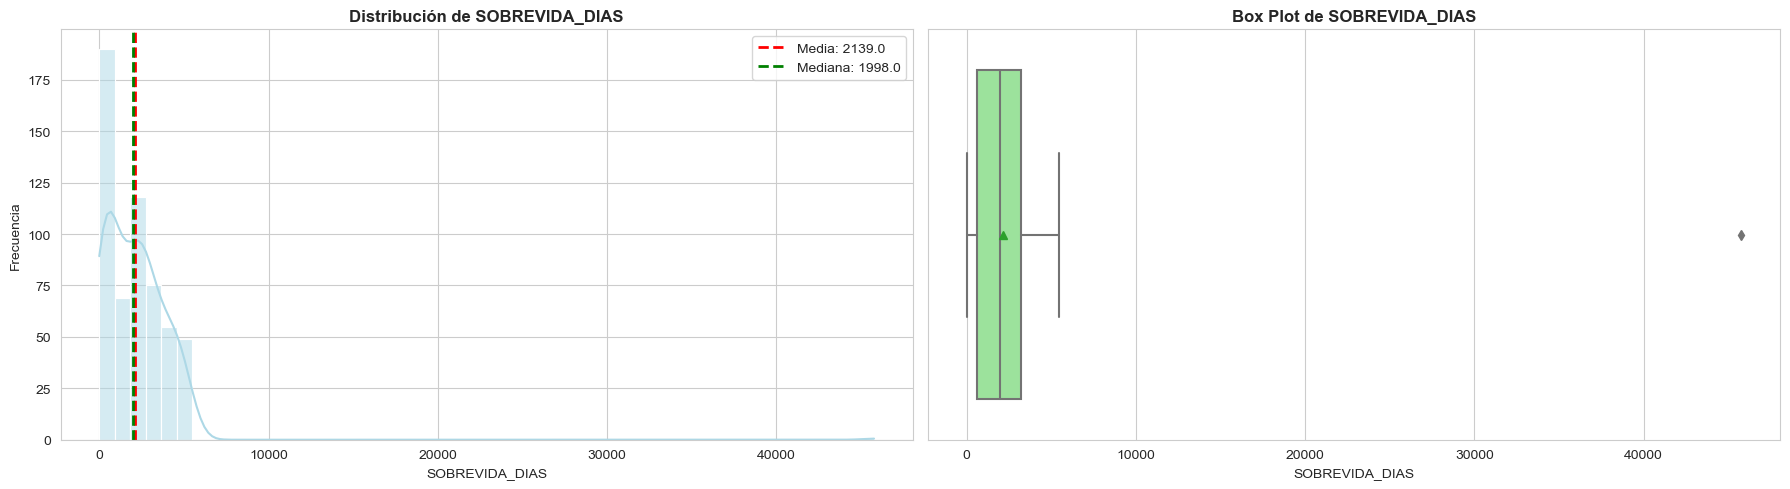

In [151]:
columna = "SOBREVIDA_DIAS"

# Convertir a numérico
infecciones_popth_df[columna] = pd.to_numeric(infecciones_popth_df[columna], errors='coerce')

# Estadísticas descriptivas
print(f"Estadísticas descriptivas de {columna}:")
print("="*50)
display(infecciones_popth_df[columna].describe())

# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))

# Histograma con KDE
sns.histplot(x=infecciones_popth_df[columna], bins=50, kde=True, ax=ax1, color='lightblue')
ax1.set_title(f'Distribución de {columna}', fontsize=12, fontweight='bold')
ax1.set_xlabel(columna, fontsize=10)
ax1.set_ylabel('Frecuencia', fontsize=10)

# Añadir líneas de media y mediana
media = infecciones_popth_df[columna].mean()
mediana = infecciones_popth_df[columna].median()
ax1.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.1f}')
ax1.axvline(mediana, color='green', linestyle='--', linewidth=2, label=f'Mediana: {mediana:.1f}')
ax1.legend()

# Boxplot horizontal
sns.boxplot(x=infecciones_popth_df[columna], ax=ax2, color='lightgreen', showmeans=True)
ax2.set_title(f'Box Plot de {columna}', fontsize=12, fontweight='bold')
ax2.set_xlabel(columna, fontsize=10)

plt.tight_layout()
plt.show()

#### **SOBREVIDA_MESES: Sobrevida en meses post trasplante**

Estadísticas descriptivas de SOBREVIDA_MESES:


C:\Users\dania\AppData\Local\Temp\ipykernel_11756\3777750566.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infecciones_popth_df[columna] = pd.to_numeric(infecciones_popth_df[columna], errors='coerce')


count     557.000000
mean       71.134704
std        80.373132
min         0.000000
25%        19.330000
50%        66.600000
75%       107.330000
max      1503.000000
Name: SOBREVIDA_MESES, dtype: float64

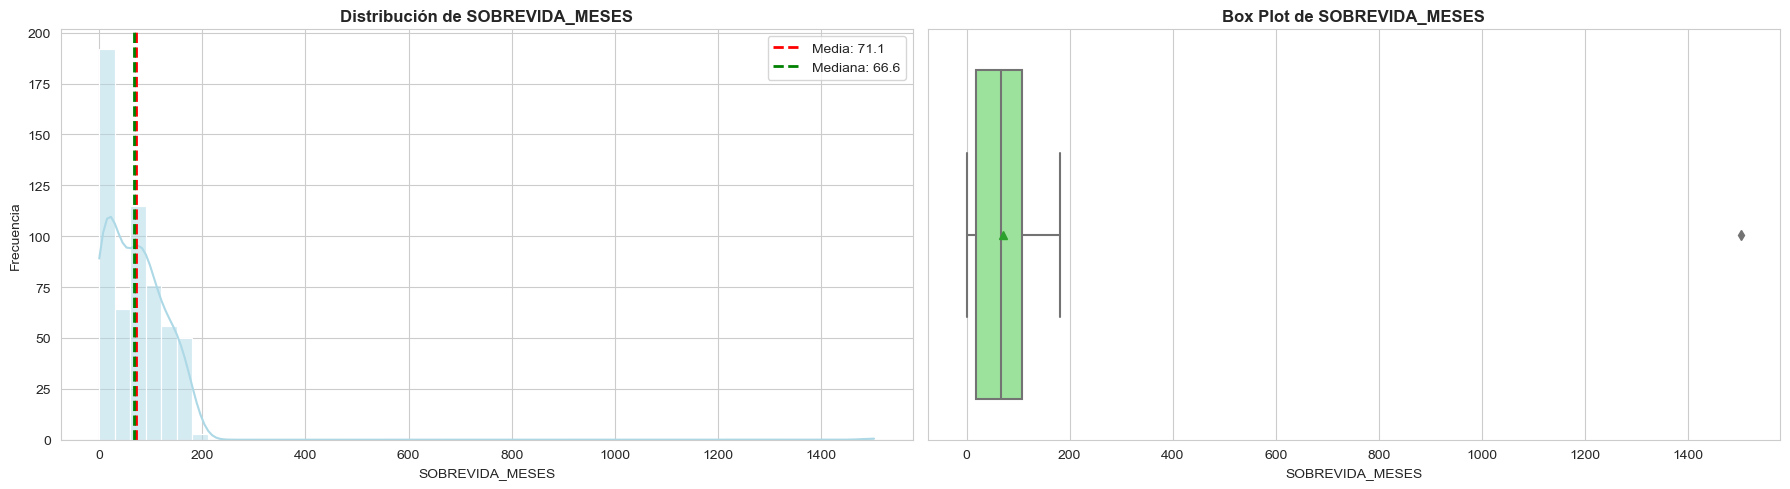

In [152]:
columna = "SOBREVIDA_MESES"

# Convertir a numérico
infecciones_popth_df[columna] = pd.to_numeric(infecciones_popth_df[columna], errors='coerce')

# Estadísticas descriptivas
print(f"Estadísticas descriptivas de {columna}:")
print("="*50)
display(infecciones_popth_df[columna].describe())

# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))

# Histograma con KDE
sns.histplot(x=infecciones_popth_df[columna], bins=50, kde=True, ax=ax1, color='lightblue')
ax1.set_title(f'Distribución de {columna}', fontsize=12, fontweight='bold')
ax1.set_xlabel(columna, fontsize=10)
ax1.set_ylabel('Frecuencia', fontsize=10)

# Añadir líneas de media y mediana
media = infecciones_popth_df[columna].mean()
mediana = infecciones_popth_df[columna].median()
ax1.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.1f}')
ax1.axvline(mediana, color='green', linestyle='--', linewidth=2, label=f'Mediana: {mediana:.1f}')
ax1.legend()

# Boxplot horizontal
sns.boxplot(x=infecciones_popth_df[columna], ax=ax2, color='lightgreen', showmeans=True)
ax2.set_title(f'Box Plot de {columna}', fontsize=12, fontweight='bold')
ax2.set_xlabel(columna, fontsize=10)

plt.tight_layout()
plt.show()

#### **SOBREVIDA_AÑOS: Sobrevida en años post trasplante**

Estadísticas descriptivas de SOBREVIDA_AÑOS:


C:\Users\dania\AppData\Local\Temp\ipykernel_11756\3505097220.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infecciones_popth_df[columna] = pd.to_numeric(infecciones_popth_df[columna], errors='coerce')


count    557.000000
mean       5.864614
std        6.732735
min        0.000000
25%        1.130000
50%        5.550000
75%        8.940000
max      125.000000
Name: SOBREVIDA_AÑOS, dtype: float64

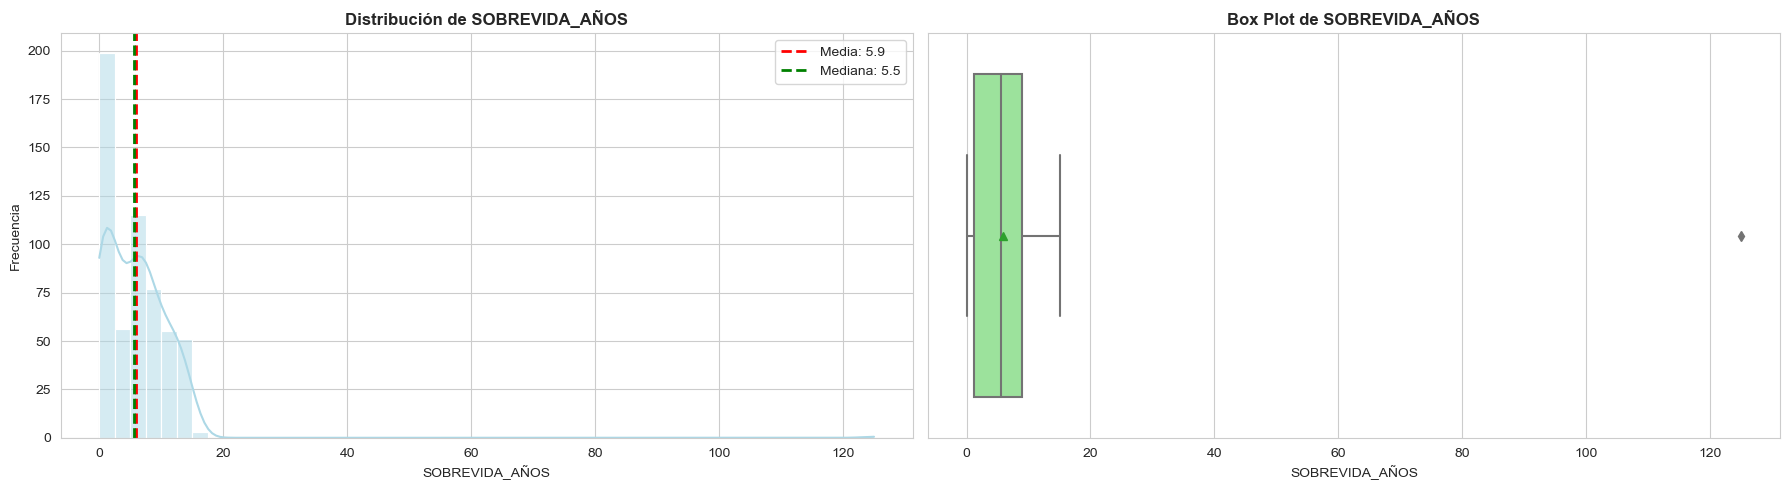

In [153]:
columna = "SOBREVIDA_AÑOS"

# Convertir a numérico
infecciones_popth_df[columna] = pd.to_numeric(infecciones_popth_df[columna], errors='coerce')

# Estadísticas descriptivas
print(f"Estadísticas descriptivas de {columna}:")
print("="*50)
display(infecciones_popth_df[columna].describe())

# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))

# Histograma con KDE
sns.histplot(x=infecciones_popth_df[columna], bins=50, kde=True, ax=ax1, color='lightblue')
ax1.set_title(f'Distribución de {columna}', fontsize=12, fontweight='bold')
ax1.set_xlabel(columna, fontsize=10)
ax1.set_ylabel('Frecuencia', fontsize=10)

# Añadir líneas de media y mediana
media = infecciones_popth_df[columna].mean()
mediana = infecciones_popth_df[columna].median()
ax1.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.1f}')
ax1.axvline(mediana, color='green', linestyle='--', linewidth=2, label=f'Mediana: {mediana:.1f}')
ax1.legend()

# Boxplot horizontal
sns.boxplot(x=infecciones_popth_df[columna], ax=ax2, color='lightgreen', showmeans=True)
ax2.set_title(f'Box Plot de {columna}', fontsize=12, fontweight='bold')
ax2.set_xlabel(columna, fontsize=10)

plt.tight_layout()
plt.show()